# Cuban Human Brain Mapping Project EDF Structure


In [3]:
import mne

In [127]:
file = '/Users/luiscamargo/Developer/datasets/Cuban Human Brain Mapping Project/CHBMP_EEG_and_MRI/ds_bids_chbmp/sub-CBM00004/eeg/sub-CBM00004_task-protmap_eeg.edf'

In [159]:
raw = mne.io.read_raw_edf(file)

Extracting EDF parameters from /Users/luiscamargo/Developer/datasets/Cuban Human Brain Mapping Project/CHBMP_EEG_and_MRI/ds_bids_chbmp/sub-CBM00004/eeg/sub-CBM00004_task-protmap_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [161]:
raw.info

Measurement date,"January 01, 2019 08:44:38 GMT"
Experimenter,Unknown
Participant,M
Digitized points,Not available
Good channels,62 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.50 Hz
Lowpass,50.00 Hz


In [160]:
raw.ch_names

['Fp1-REF',
 'Fp2-REF',
 'F3 -REF',
 'F4 -REF',
 'C3 -REF',
 'C4 -REF',
 'P3 -REF',
 'P4 -REF',
 'O1 -REF',
 'O2 -REF',
 'F7 -REF',
 'F8 -REF',
 'T7 -REF',
 'T8 -REF',
 'P7 -REF',
 'P8 -REF',
 'Fz -REF',
 'Cz -REF',
 'Pz -REF',
 'F1 -REF',
 'F2 -REF',
 'P1 -REF',
 'P2 -REF',
 'AF3-REF',
 'AF4-REF',
 'P5 -REF',
 'P6 -REF',
 'FC5-REF',
 'FC6-REF',
 'C5 -REF',
 'C6 -REF',
 'FT7-REF',
 'TP7-REF',
 'TP8-REF',
 'PO5-REF',
 'PO6-REF',
 'AF7-REF',
 'AF8-REF',
 'FpZ-REF',
 'FCZ-REF',
 'CPZ-REF',
 'POZ-REF',
 'OZ -REF',
 'PO3-REF',
 'PO4-REF',
 'CP1-REF',
 'CP2-REF',
 'CP3-REF',
 'CP4-REF',
 'C1 -REF',
 'C2 -REF',
 'F5 -REF',
 'F6 -REF',
 'FT8-REF',
 'FC3-REF',
 'FC4-REF',
 'FC1-REF',
 'FC2-REF',
 'CP5-REF',
 'CP6-REF',
 'PO7-REF',
 'PO8-REF']

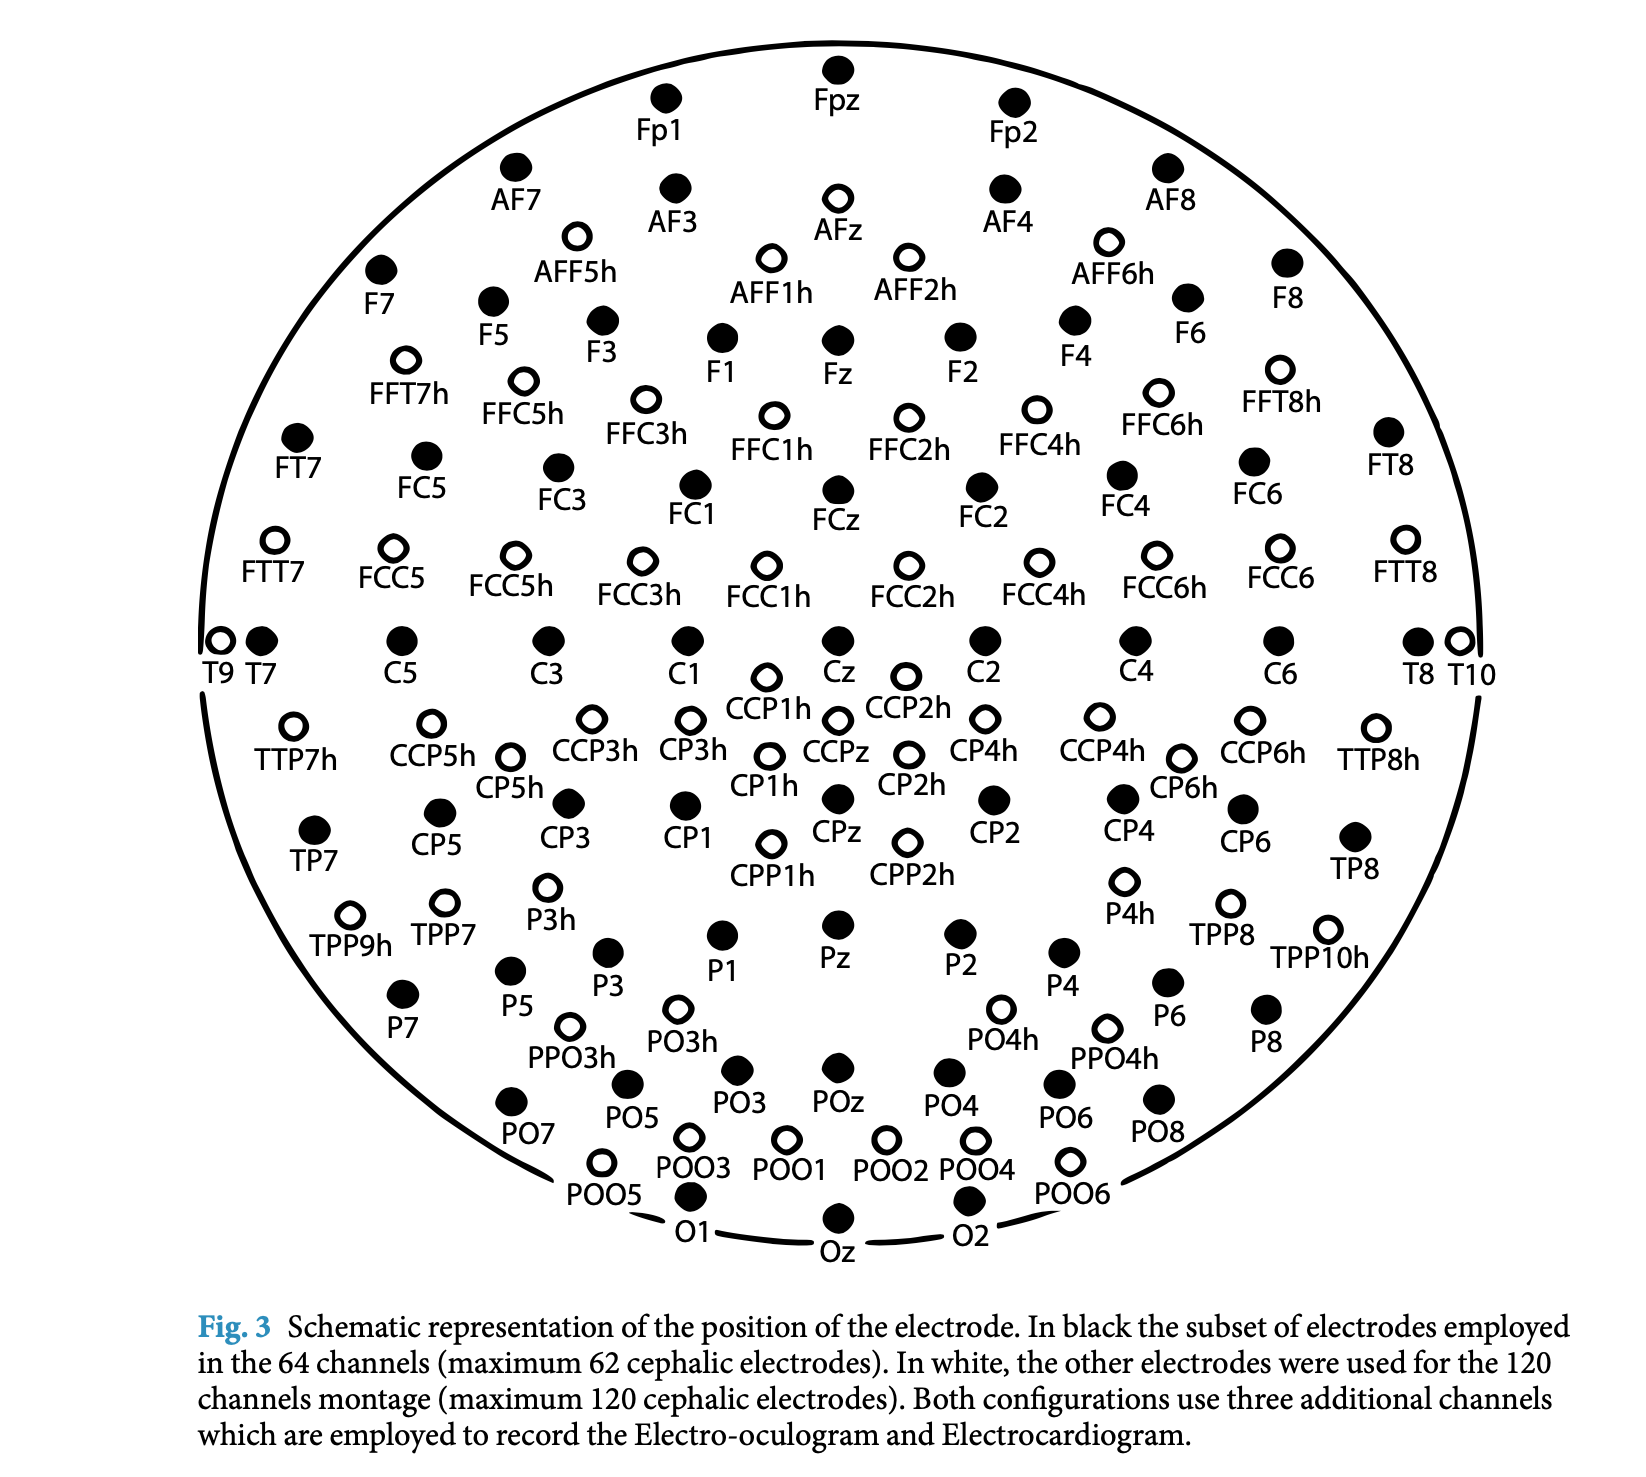

## The Cuban Human Brain Mapping Project follows the 10-10 system, with some EEG recordings comprised of 64 channels. For the simplicity we will develop a parser to only ingest channels corresponding to the standard 19 channels 10-20 set up.

In [128]:
"""Organize all of the variables that correspond to constants and configurations across the module"""

# EEG CHANNELS

CHANNELS_10_20 = [
    "Fp1",
    "Fp2",
    "F3",
    "F4",
    "C3",
    "C4",
    "P3",
    "P4",
    "O1",
    "O2",
    "F7",
    "F8",
    "T3",
    "T4",
    "T5",
    "T6",
    "Fz",
    "Cz",
    "Pz",
]

CONVERT_TO_10_20 = {
    'Fp1': 'Fp1',
    'Fp2': 'Fp2',
    'F3': 'F3',
    'F4': 'F4',
    'C3': 'C3',
    'C4': 'C4',
    'P3': 'P3',
    'P4': 'P4',
    'O1': 'O1',
    'O2': 'O2',
    'F7': 'F7',
    'F8': 'F8',
    'T7': 'T3',  # T7 in 10-10 corresponds to T3 in 10-20
    'T8': 'T4',  # T8 in 10-10 corresponds to T4 in 10-20
    'P7': 'T5',  # P7 in 10-10 corresponds to T5 in 10-20
    'P8': 'T6',  # P8 in 10-10 corresponds to T6 in 10-20
    'Fz': 'Fz',
    'Cz': 'Cz',
    'Pz': 'Pz'
}



In [164]:
def load_eeg_data(raw):
    channels_10_10 = {channel: channel.replace("-REF", "").strip(" ") for channel in raw.ch_names}
    raw.rename_channels(channels_10_10)
    raw.rename_channels(CONVERT_TO_10_20)
    channel_types = {ch:'eeg' for ch in CHANNELS_10_20}
    raw.set_channel_types(channel_types)
    raw.pick_channels(CHANNELS_10_20)

    # Get the standard 10-20 montage
    #montage = mne.channels.make_standard_montage('standard_1020')

    # Set the montage for the raw data
    raw.set_montage(montage)

    return raw

In [165]:
raw = load_eeg_data(raw)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


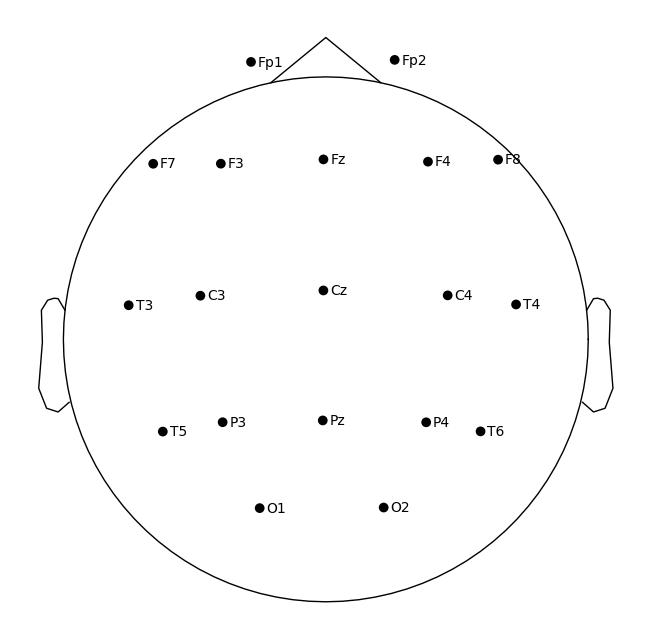

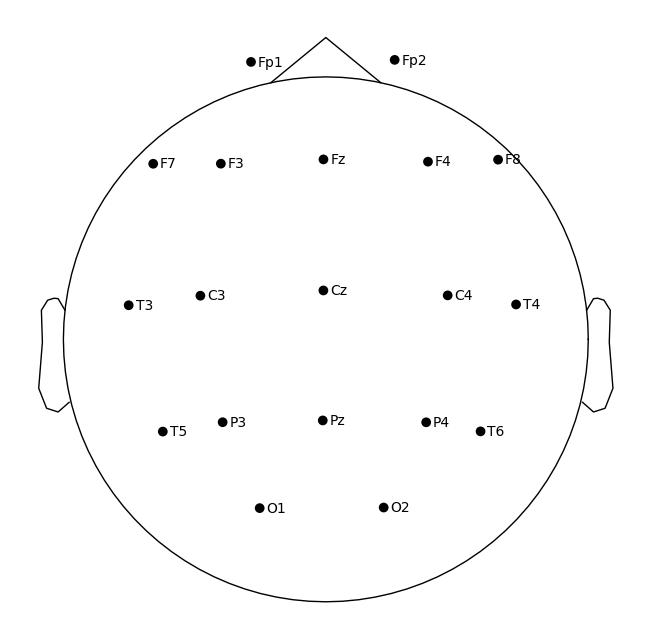

In [166]:
raw_eeg_only = new_raw.pick_types(eeg=True, meg=False, eog=False, stim=False, exclude='bads')
#raw_eeg_only.plot(start=30, duration=30)
raw_eeg_only.plot_sensors(kind='topomap', show_names=True)


In [135]:
import mne
from mne.io import Raw

import abc

class Parser(abc.ABC):
    """
    Abstract base class for objects that interact with MNE in parsing EEG data
    from various systems across physiological datasets.
    """

    @abc.abstractmethod
    def read_eeg(self, filepath: str) -> Raw:
        """
        Abstract method to load EEG data from a file.
        :param filepath: Path to the file
        """
        pass

    @abc.abstractmethod
    def load_eeg(self, raw: Raw) -> Raw:
        """
        Abstract method to perform initial processing on the raw EEG data.
        :param raw: Raw EEG data
        """
        pass

    @abc.abstractmethod
    def reconfigure_eeg_channels(self, raw: Raw) -> Raw:
        """
        Abstract method to reconfigure EEG channels in the raw data.
        :param raw: Raw EEG data
        """
        pass

In [136]:
class EdfParser(Parser):
    """
    Class for parsing EEG data from EDF files using MNE.
    """

    def read_eeg(self, filepath: str) -> Raw:
        """
        Load EEG data from an EDF file.
        :param filepath: Path to the EDF file
        """
        raw = mne.io.read_raw_edf(filepath, preload=True)
        self.reconfigure_eeg_channels(raw)
        return self.load_eeg(raw)


    def load_eeg(self, raw: Raw) -> Raw:
        """
        Apply the standard 10-20 montage to the raw EEG data.
        :param raw: Raw EEG data
        """
        montage = mne.channels.make_standard_montage('standard_1020')
        raw.set_montage(montage)
        return raw

    def reconfigure_eeg_channels(self, raw: Raw) -> Raw:
        """
        Default implementation of reconfiguring EEG channels. 
        This can be overridden in subclasses for specific behavior.
        :param raw: Raw EEG data
        """
        return raw

In [155]:
class CHBMP(EdfParser):
    def open(self, filepath: str) -> Raw:
        """
        Reads an EDF file and extracts channels according to the 10-20 system.
        """
        raw = super().read_eeg(filepath)
        return raw 
        
    def reconfigure_eeg_channels(self, raw: Raw) -> Raw:
        """
        Custom configuration for EEG channels specific to CHBMP.
        """
        # Rename channels by removing "-REF" and extra spaces
        channels_10_10 = {channel: channel.replace("-REF", "").strip(" ") for channel in raw.ch_names}
        raw.rename_channels(channels_10_10)

        # Rename channels as per 10-20 system 
        raw.rename_channels(CONVERT_TO_10_20)

        # Set channel types and pick only specified channels
        raw.pick(picks=CHANNELS_10_20)

        return raw

In [156]:
chbmp_parser = CHBMP()

In [157]:
data = chbmp_parser.read_eeg(file)

Extracting EDF parameters from /Users/luiscamargo/Developer/datasets/Cuban Human Brain Mapping Project/CHBMP_EEG_and_MRI/ds_bids_chbmp/sub-CBM00004/eeg/sub-CBM00004_task-protmap_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 383999  =      0.000 ...  1919.995 secs...


In [158]:
data.info

Measurement date,"January 01, 2019 08:44:38 GMT"
Experimenter,Unknown
Participant,M
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,0.50 Hz
Lowpass,50.00 Hz
